In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import plotly.express as px
from sklearn.decomposition import PCA
import plotly as pl

In [2]:
data = pd.read_csv("back_order.csv")

In [3]:
data.head(10)

,Unnamed: 0,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,3352105,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,Yes
1,1,3403239,6.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,Yes
2,2,3286560,0.0,2.0,0.0,4.0,7.0,7.0,0.0,0.0,...,0.0,0.70,0.73,0.0,No,No,No,Yes,No,Yes
3,3,3299078,7.0,8.0,0.0,11.0,27.0,47.0,2.0,2.0,...,0.0,0.70,0.73,0.0,No,No,No,Yes,No,Yes
4,4,3314098,0.0,8.0,0.0,9.0,14.0,16.0,0.0,0.0,...,0.0,0.95,0.94,0.0,No,No,No,Yes,No,Yes
5,5,3316047,0.0,4.0,0.0,10.0,10.0,10.0,0.0,0.0,...,0.0,0.57,0.68,0.0,Yes,No,No,Yes,No,Yes
6,6,3317147,0.0,8.0,0.0,2.0,3.0,4.0,0.0,1.0,...,0.0,0.56,0.68,0.0,No,No,No,Yes,No,Yes
7,7,3319588,0.0,8.0,0.0,22.0,44.0,60.0,0.0,0.0,...,0.0,0.83,0.91,0.0,No,No,No,Yes,No,Yes
8,8,3323488,0.0,2.0,0.0,16.0,16.0,16.0,9.0,21.0,...,0.0,0.97,0.96,0.0,No,No,No,Yes,No,Yes
9,9,3325147,3.0,8.0,0.0,25.0,39.0,53.0,11.0,22.0,...,0.0,0.51,0.57,0.0,No,No,No,Yes,No,Yes


## Data Summary

In [4]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,9688,NaN,NaN,NaN,4843.5,2796.83,0,2421.75,4843.5,7265.25,9687
sku,9688,NaN,NaN,NaN,3.40462e+06,69309.4,3.28495e+06,3.34489e+06,3.40378e+06,3.46425e+06,3.52699e+06
national_inv,9688,NaN,NaN,NaN,353.05,4778.74,-2567,2,9,60,389335
lead_time,8473,NaN,NaN,NaN,7.0812,5.75544,0,2,8,8,52
in_transit_qty,9688,NaN,NaN,NaN,52.6268,615.877,0,0,0,0,36334
forecast_3_month,9688,NaN,NaN,NaN,474.945,11083.2,0,0,3,40,1.02194e+06
forecast_6_month,9688,NaN,NaN,NaN,873.231,22473.7,0,0,5,75,2.09445e+06
forecast_9_month,9688,NaN,NaN,NaN,1256.47,33628.8,0,0,7,108,3.16226e+06
sales_1_month,9688,NaN,NaN,NaN,108.549,3140.32,0,0,1,10,299190
sales_3_month,9688,NaN,NaN,NaN,365.106,11320.3,0,0,3,34,1.08655e+06


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9688 entries, 0 to 9687
Data columns (total 24 columns):
Unnamed: 0           9688 non-null int64
sku                  9688 non-null int64
national_inv         9688 non-null float64
lead_time            8473 non-null float64
in_transit_qty       9688 non-null float64
forecast_3_month     9688 non-null float64
forecast_6_month     9688 non-null float64
forecast_9_month     9688 non-null float64
sales_1_month        9688 non-null float64
sales_3_month        9688 non-null float64
sales_6_month        9688 non-null float64
sales_9_month        9688 non-null float64
min_bank             9688 non-null float64
potential_issue      9688 non-null object
pieces_past_due      9688 non-null float64
perf_6_month_avg     9688 non-null float64
perf_12_month_avg    9688 non-null float64
local_bo_qty         9688 non-null float64
deck_risk            9688 non-null object
oe_constraint        9688 non-null object
ppap_risk            9688 non-null objec

In [6]:
print('Number of rows in the data',data.shape[0])
print('Number of features in the data',data.shape[1])

Number of rows in the data 9688
Number of features in the data 24


In [7]:
#checking how many unique values are in columns
for col in data.columns:
    print(len(data[col].unique()))

9688
9688
1096
25
472
990
1246
1421
609
1008
1317
1501
581
2
290
101
102
90
2
2
2
2
2
2


In [8]:
# for i in data.columns:
#     for j in data[i]:
#         print(i,"          " ,type(j))
#         break

## Transforming String Featurtes

In [9]:
str_col = ["potential_issue","deck_risk","oe_constraint","ppap_risk","stop_auto_buy","rev_stop","went_on_backorder"]

In [10]:
for col in str_col:
    print(data[col].unique())

['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']


In [11]:
#encoding categorical values
for col in str_col:
    data[col] = data[col].map({"Yes" : 0, "No" : 1})

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9688 entries, 0 to 9687
Data columns (total 24 columns):
Unnamed: 0           9688 non-null int64
sku                  9688 non-null int64
national_inv         9688 non-null float64
lead_time            8473 non-null float64
in_transit_qty       9688 non-null float64
forecast_3_month     9688 non-null float64
forecast_6_month     9688 non-null float64
forecast_9_month     9688 non-null float64
sales_1_month        9688 non-null float64
sales_3_month        9688 non-null float64
sales_6_month        9688 non-null float64
sales_9_month        9688 non-null float64
min_bank             9688 non-null float64
potential_issue      9688 non-null int64
pieces_past_due      9688 non-null float64
perf_6_month_avg     9688 non-null float64
perf_12_month_avg    9688 non-null float64
local_bo_qty         9688 non-null float64
deck_risk            9688 non-null int64
oe_constraint        9688 non-null int64
ppap_risk            9688 non-null int64
st

In [13]:
data['went_on_backorder'].unique()

array([0, 1], dtype=int64)

In [14]:
data.isna().sum()

Unnamed: 0              0
sku                     0
national_inv            0
lead_time            1215
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

In [15]:
data = data.dropna()

In [16]:
data.isna().sum()

Unnamed: 0           0
sku                  0
national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

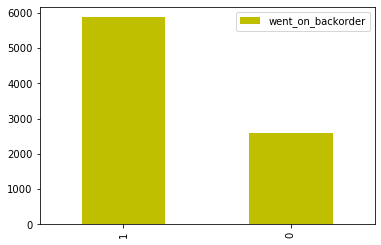

In [17]:
pd.DataFrame(data['went_on_backorder'].value_counts()).plot(kind='bar', color = 'y')

C:\Users\OMEN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


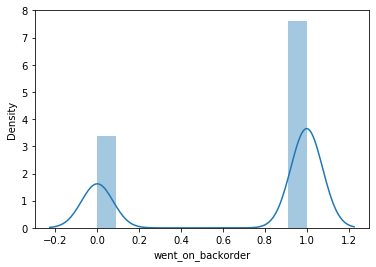

In [18]:
sns.distplot(data['went_on_backorder'])

C:\Users\OMEN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


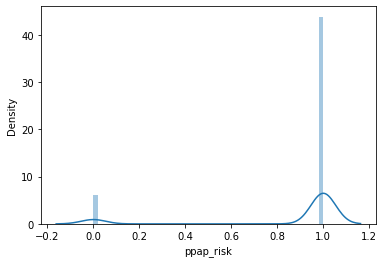

In [19]:
a = sns.distplot(data['ppap_risk'])

C:\Users\OMEN\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


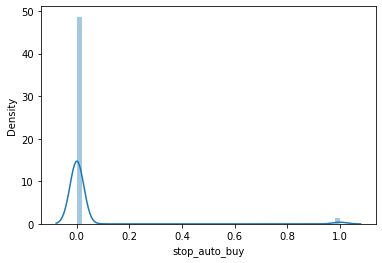

In [20]:
b = sns.distplot(data['stop_auto_buy'])

In [21]:
X = data.drop(["went_on_backorder","Unnamed: 0","sku"],axis=1)

In [22]:
y =data["went_on_backorder"]

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scalar = StandardScaler()

In [25]:
X_scaled = pd.DataFrame(scalar.fit_transform(X),columns=X.columns)

X_scaled

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,-0.072887,-0.882903,-0.091009,-0.045406,-0.041172,-0.039675,-0.036789,-0.034331,-0.034725,-0.034221,...,0.0392,-0.045124,0.161039,0.150703,-0.050609,0.432082,0.01882,0.375897,-0.164409,0.028755
1,-0.071505,0.159650,-0.091009,-0.044815,-0.040339,-0.038562,-0.036193,-0.034166,-0.034641,-0.034165,...,0.0392,-0.045124,0.161039,0.150703,-0.050609,0.432082,0.01882,0.375897,-0.164409,0.028755
2,-0.072887,0.159650,-0.091009,-0.044984,-0.040880,-0.039425,-0.036789,-0.034331,-0.034725,-0.034221,...,0.0392,-0.045124,0.176799,0.164959,-0.050609,0.432082,0.01882,0.375897,-0.164409,0.028755
3,-0.072887,-0.535385,-0.091009,-0.044900,-0.041047,-0.039592,-0.036789,-0.034331,-0.034725,-0.034221,...,0.0392,-0.045124,0.152844,0.147308,-0.050609,-2.314377,0.01882,0.375897,-0.164409,0.028755
4,-0.072887,0.159650,-0.091009,-0.045575,-0.041338,-0.039758,-0.036789,-0.034249,-0.034641,-0.034165,...,0.0392,-0.045124,0.152214,0.147308,-0.050609,0.432082,0.01882,0.375897,-0.164409,0.028755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8468,-0.072887,-0.882903,-0.091009,-0.041102,-0.039174,-0.038340,-0.036789,-0.034331,-0.034725,-0.034221,...,0.0392,-0.029295,0.116911,0.101146,-0.050609,-2.314377,0.01882,-2.660304,-0.164409,0.028755
8469,-0.063998,0.854685,-0.060618,-0.041271,-0.037592,-0.036143,-0.032619,-0.029374,-0.029675,-0.029351,...,0.0392,-0.030351,0.161039,0.152739,-0.050609,0.432082,0.01882,0.375897,-0.164409,0.028755
8470,-0.047206,0.159650,-0.022629,-0.039836,-0.034804,-0.033194,-0.021003,-0.024251,-0.025898,-0.025456,...,0.0392,-0.034572,0.169865,0.159528,-0.024085,0.432082,0.01882,0.375897,-0.164409,0.028755
8471,-0.074270,0.159650,-0.091009,-0.041946,-0.038633,-0.037227,-0.032917,-0.031440,-0.031585,-0.031605,...,0.0392,-0.041958,0.148431,0.132373,0.135056,0.432082,0.01882,0.375897,-0.164409,0.028755


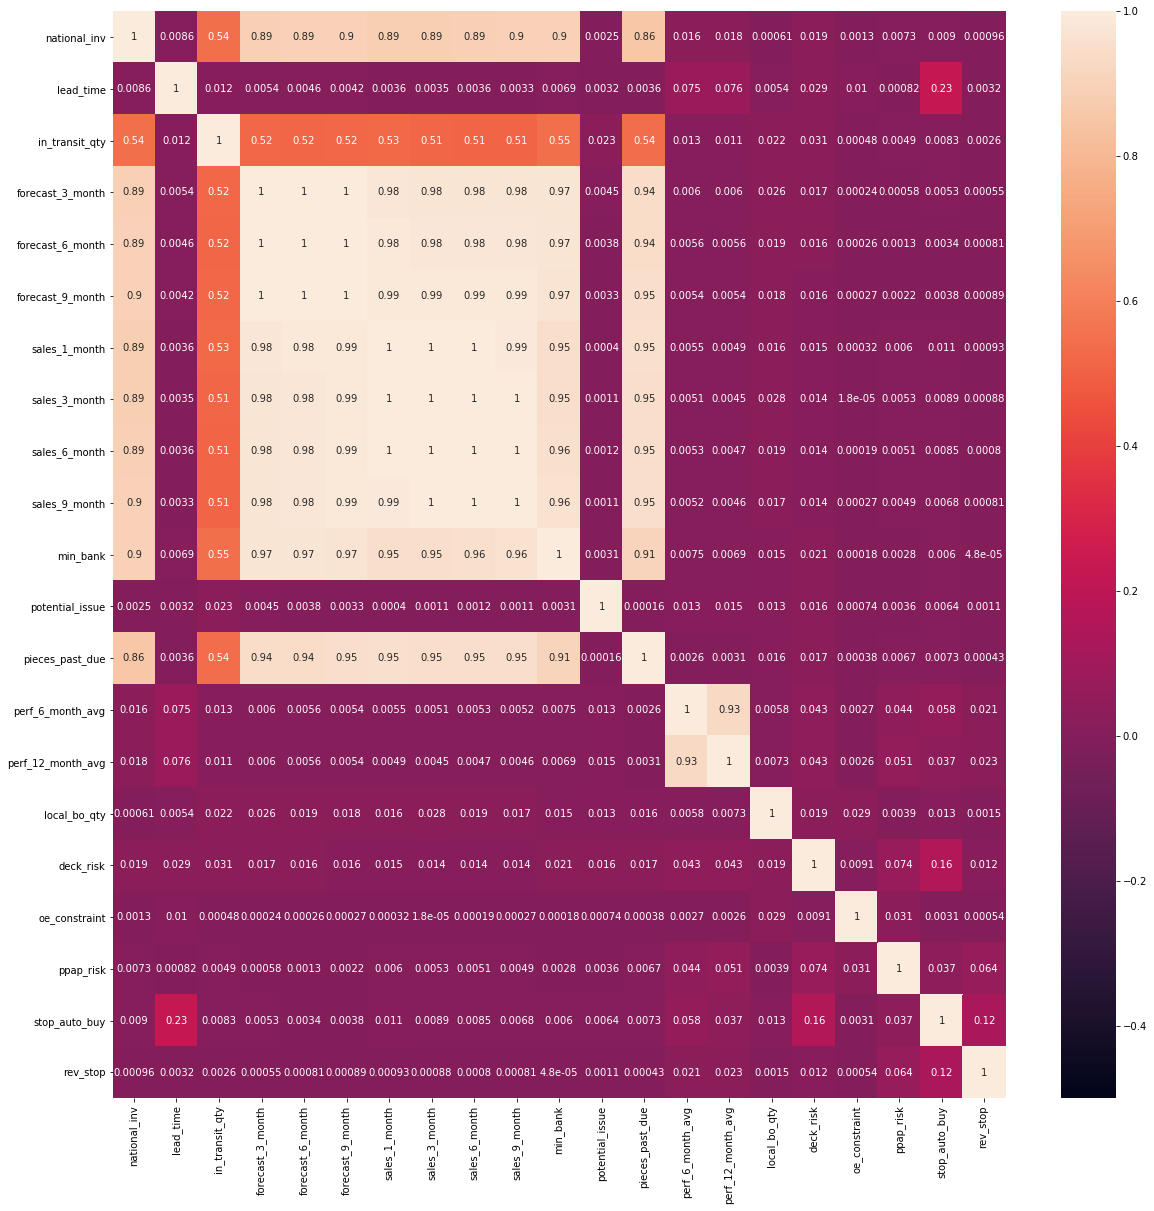

In [26]:
plt.figure(figsize=(20,20))
plt_data =X_scaled
    #ax = plot.subplot(5,3,plotnumber)
sns.heatmap(plt_data.corr().abs(), vmin = -0.5,vmax = 1,annot=True)

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled.values

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [28]:
vif

,VIF,Features
0,5.940944,national_inv
1,1.066662,lead_time
2,1.792865,in_transit_qty
3,703.150833,forecast_3_month
4,7104.115768,forecast_6_month
5,5858.998007,forecast_9_month
6,364.018624,sales_1_month
7,2091.142745,sales_3_month
8,7578.390952,sales_6_month
9,4337.186397,sales_9_month


In [29]:
vif[vif["VIF"]>8].count()

VIF         9
Features    9
dtype: int64

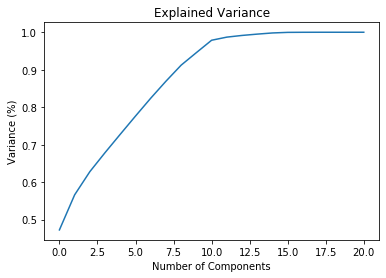

In [30]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [32]:
pca = PCA(n_components=10)
new_data = pca.fit_transform(X_scaled)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])

In [33]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10
0,-0.146977,-0.433022,-0.729319,0.056507,-0.099197,0.212689,-0.079751,-0.022828,0.420916,0.307728
1,-0.146852,-0.285817,-0.232759,-0.412961,0.087958,0.235365,-0.014221,-0.233929,-0.059117,-0.103373
2,-0.147840,-0.306471,-0.227972,-0.412696,0.087808,0.234931,-0.014490,-0.234026,-0.060151,-0.103843
3,-0.164588,-0.120601,0.521726,0.491420,-0.420062,-1.372481,0.297566,0.656711,1.497714,-0.503746
4,-0.148270,-0.277441,-0.234695,-0.413078,0.088067,0.235556,-0.014137,-0.233876,-0.058675,-0.102950
...,...,...,...,...,...,...,...,...,...,...
8468,-0.162045,0.138850,0.914047,2.650154,-0.995514,-1.413985,0.339698,1.430625,-0.343567,-0.232361
8469,-0.121873,-0.189372,0.097764,-0.725772,0.213683,0.250633,0.027651,-0.375335,-0.380151,-0.359985
8470,-0.090501,-0.298732,-0.231420,-0.411198,0.110433,0.240224,-0.020142,-0.219846,-0.060522,-0.065395
8471,-0.139416,-0.266298,-0.234515,-0.403865,0.231937,0.268687,-0.025890,-0.123103,-0.047756,-0.113183


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = principal_x.values

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = principal_x.columns

In [35]:
vif

,VIF,Features
0,1.0,PC-1
1,1.0,PC-2
2,1.0,PC-3
3,1.0,PC-4
4,1.0,PC-5
5,1.0,PC-6
6,1.0,PC-7
7,1.0,PC-8
8,1.0,PC-9
9,1.0,PC-10


#### Data ImBalance

C:\Users\OMEN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


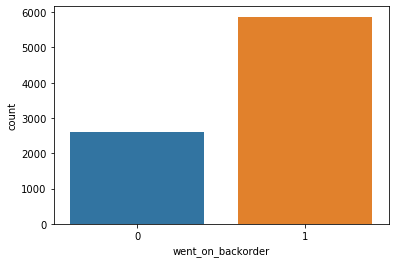

In [36]:
sns.countplot(y)

Looks fairly balanced. We can go ahead without handling the imbalance.

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train,y_test = train_test_split(principal_x,y,test_size = 0.3)

In [39]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

In [40]:
rf = RandomForestClassifier()

In [41]:
lr = LogisticRegression()

In [42]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
rf.score(x_train,y_train)

0.9969650986342944

In [44]:
rf.score(x_test,y_test)

0.7974036191974823

In [45]:
pred = rf.predict(x_test)

In [46]:
(pred - y_test).unique()

array([ 0,  1, -1], dtype=int64)

In [47]:
pd.DataFrame(principal_x.columns,(rf.feature_importances_))

,0
0.124467,PC-1
0.079122,PC-2
0.081412,PC-3
0.089618,PC-4
0.086249,PC-5
0.076342,PC-6
0.076405,PC-7
0.164400,PC-8
0.086032,PC-9
0.135954,PC-10


In [48]:
lr.fit(x_train,y_train)

LogisticRegression()

In [49]:
lr.score(x_test,y_test)

0.6880409126671911